In [1]:
! pip install konlpy
% tensorflow_version 1.x

     |████████████████████████████████| 19.4MB 1.6MB/s 
     |████████████████████████████████| 460kB 33.4MB/s 
     |████████████████████████████████| 92kB 10.6MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
TensorFlow 1.x selected.


In [ ]:
#! unzip '/content/crowling_folder-20210102T151343Z-001.zip'

In [ ]:
path = 'crowling_folder/'

In [ ]:
import numpy as np
import pandas
import tensorflow_hub as hub
import tensorflow as tf
import urllib.request
import time
from keras.models import Model
from keras.layers import Dense, Lambda, Input, Dropout
from keras import optimizers
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import json

Using TensorFlow backend.


In [ ]:
# import numpy as np
# import pandas
# import tensorflow_hub as hub
# import tensorflow as tf
# import urllib.request
# import time
# from keras.models import Model
# from keras.layers import Dense, Lambda, Input, Dropout
# from keras import optimizers
# from konlpy.tag import Okt
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import re
# import json
# #####  리눅스 최종 version  #####
# ### tensorflow version: 1.15.2, tensorflow_hub version : 0.10.0 (걍 깔면 이거 됨), keras 2.3.1
# ### h5py version 2.10.0
# #이거 서버에 올린거니깐 신경 ㄴㄴ
# class ELMO():
#   def __init__(self):
#     self.elmo = hub.Module("https://tfhub.dev/google/elmo/1", trainable=True)
#     self.okt = Okt()
#   def ELMoEmbedding(self, x):
#     return self.elmo(tf.squeeze(tf.cast(x, tf.string)))
#   def elmo_model(self):
#     input_text = Input(shape=(1,), dtype=tf.string)
#     embedding_layer = Lambda(self.ELMoEmbedding, output_shape=(1024, ))(input_text)
#     hidden_layer = Dense(256, activation='relu')(embedding_layer)
#     dropout = Dropout(0.5)(hidden_layer)
#     output_layer = Dense(4, activation='softmax')(dropout)
#     model = Model(inputs = [input_text], outputs = output_layer)
#     model.load_weights('./params/real_elmo_weight.h5')
#     return model

#   def tokenize(self, data):
#       stopwords = ['ㅋ','ㅎ','ㅠㅠ','ㅜㅜ','^^','의','을','(','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
#       emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)
#       han = re.compile(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
#       arr = []
#       for sen in data:
#           sen = re.sub(emoji_pattern, "", sen)
#           sen = re.sub(han, "", sen)
#           temp = self.okt.morphs(sen, stem = True)#True
#           temp = [word for word in temp if not word in stopwords]
#           arr.append(' '.join(temp))
#       return arr

#   def elmo_model_2(self):
#     input_text = Input(shape=(1,), dtype=tf.string)
#     embedding_layer = Lambda(self.ELMoEmbedding, output_shape=(1024, ))(input_text)
#     hidden_layer = Dense(256, activation='relu')(embedding_layer)
#     dropout = Dropout(0.5)(hidden_layer)
#     output_layer = Dense(4, activation='softmax')(dropout)
#     model = Model(inputs = [input_text], outputs = output_layer)
#     model.load_weights('./params/best_t_elmo_model_onlytrain_weight.h5')

#     return model

# class GRU_model():
#     def __init__(self):
#         self.max_len = 8
#         self.okt = Okt()
#         self.num_words = 15798
#         self.tokenizer = Tokenizer(self.num_words+3)
#         with open('./params/base_wordIndex.json') as json_file:
#             word_index = json.load(json_file)
#             self.tokenizer.word_index = word_index
#     def base_model(self):
#         model = load_model('./params/base_t_model.h5')
#         return model


#     def tokenize(self, multi_data):
#         stopwords = stopwords = ['백주부','ㅋ','ㅎ','ㅠ','ㅜㅜ','^^','의','(','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', 'ㄴ','ㅠ',',','0',';','ㅜ','/','~','!','?','♥♥','♡♡','♡','♥']
#         emoji_pattern = re.compile("["
#         u"\U0001F600-\U0001F64F"  # emoticons
#         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#         u"\U0001F680-\U0001F6FF"  # transport & map symbols
#         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                            "]+", flags=re.UNICODE)
#         han = re.compile(r'[ㄱ-ㅎㅏ-ㅣ!?~,".\n\r#\ufeff\u200d]')
#         arr=  []
#         for sen in multi_data:
#           sen = re.sub(emoji_pattern, "", sen)
#           sen = re.sub(han, "", sen)
#           temp = self.okt.morphs(sen, stem = True)#True
#           temp = [word for word in temp if not word in stopwords]
#           arr.append(temp)
        
#         return arr


# class predicts():
#     def __init__(self):
#         self.gru = GRU_model()
#         self.elmo = ELMO()
#         self.base_model = self.gru.base_model()
#         self.loaded_model = self.elmo.elmo_model()
#         self.train_loaded_model = self.elmo.elmo_model_2()


#     def predict_base(self, new_sentence):
#         new_sen = self.gru.tokenize(new_sentence)
#         encoded = self.gru.tokenizer.texts_to_sequences(new_sen)
#         print(encoded)
#         pad_new = pad_sequences(encoded, maxlen = self.gru.max_len)
#         pred = self.base_model.predict(pad_new)
#         return pred

#     def predict_elmo(self, new_sentence):
#         data = new_sentence
#         new_sen = self.elmo.tokenize(data)
#         pred = self.loaded_model.predict(np.array(new_sen))
#         return pred
#     def predict_train_elmo(self, new_sentence):
#         data = new_sentence
#         new_sen = self.elmo.tokenize(data)
#         pred = self.train_loaded_model.predict(np.array(new_sen))
#         return pred

#     def soft_voting_ensemble(self, p1, p2):
#         return p1 + p2

#     def predict(self, new_sentence):
#         pred = self.predict_elmo(new_sentence)
#         pred_base = self.predict_base(new_sentence)
#         pred_train_elmo = self.predict_train_elmo(new_sentence)

#         # if np.max(pred[0])>=0.6:
#         #     return np.argmax(pred[0]), np.max(pred[0])
#         #     print('%.2f'%(np.max(pred[0])*100) +'% 의 확률로 ',emotion_dic[np.argmax(pred[0])])
#         # #return pred_base
#         # else:
#         #voting_pred = self.soft_voting_ensemble(pred_train_elmo[0], pred_base)
#         return pred_base
#         #return np.argmax(voting_pred[0]), np.max(voting_pred[0])/2
#             #print('%.2f'%(np.max(voting_pred[0])*100/3) +'% 의 확률로 ',emotion_dic[np.argmax(voting_pred[0])])



In [ ]:
import pandas as pd
import numpy as np 
from models import predict

In [ ]:
predict_class= predict()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
anger = pd.read_csv('insta_anger3.csv',encoding='cp949')
anger = pd.concat([anger, pd.read_csv('insta_anger2.csv', encoding = 'cp949')])
# anger = pd.concat([anger, pd.read_csv('insta_anger3.csv', encoding = 'cp949')])


In [ ]:
anger = anger.dropna()['senten']

In [ ]:
sad = pd.read_csv('insta_sadness.csv', encoding = 'cp949')
sad = pd.concat([sad, pd.read_csv('insta_sadness3.csv', encoding = 'cp949')])
sad = pd.concat([sad, pd.read_csv('insta_sadness4.csv', encoding = 'cp949')])
#sad= pd.concat([sad, pd.read_csv('insta_sadness2.csv', encoding = 'cp949')])
sad = sad.dropna()['senten']

In [ ]:
happy = pd.read_csv('insta_happy5.csv', encoding = 'cp949')
happy = pd.concat([happy, pd.read_csv('insta_happy2.csv', encoding = 'cp949')])
happy = pd.concat([happy, pd.read_csv('insta_happy3.csv', encoding = 'cp949')])
happy = happy.dropna()['senten']

In [ ]:
# meh = pd.read_csv('insta_meh.csv', encoding='cp949')
# meh = meh.dropna()['senten']

In [ ]:
len(sad)#335 -> 282 ->205->419
len(happy)#240 ->258 -> 501-> 632 ->187 ->566
#len(anger)#119 -> 262 ->564 ->458
#len(meh)#302

566

In [ ]:
test_D = []
test_D.extend(sad)
test_D.extend(happy)
test_D.extend(anger)
#test_D.extend(meh)
len(test_D) #1157 -> 1531 -1086

1443

In [ ]:
#화남 슬픔 중립  행복
sad_L = [1] * len(sad)
happy_L = [3] * len(happy)
anger_L = [0] * len(anger)
#meh_L = [2] * len(meh)
test_L = []
test_L.extend(sad_L)
test_L.extend(happy_L)
test_L.extend(anger_L)
#test_L.extend(meh_L)
len(test_L)

1443

In [ ]:
new_dataset = {}
new_dataset['Emotion'] = test_L
new_dataset['Sentence'] = test_D
pd.DataFrame(new_dataset).to_csv('insta_dataset.csv', index = False)

In [ ]:
aihub_dataset = pd.read_csv('AIHub_test_dataset.csv')
hub_test_D = aihub_dataset['Sentence']
hub_test_L = aihub_dataset['Emotion']

In [ ]:
print(len(new_dataset))
print(len(aihub_dataset))

In [ ]:
prediction_hub = []
percentage_hub = []
for test in hub_test_D:
  pred, percent = predict_class.predict(test)
  prediction_hub.append(pred)
  percentage_hub.append(percent)
# = predict_class.predict(test_D)

In [ ]:
prediction = []
percentage = []
for test in test_D:
  pred, percent = predict_class.predict(test)
  prediction.append(pred)
  percentage.append(percent)
# = predict_class.predict(test_D)

In [ ]:
# from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
# print('accuracy:', accuracy_score(sad_L, prediction)) #0.61

accuracy: 0.6420047732696897


In [ ]:
# pred  = predict_class.predict('한번 아프고 나더니')
# print(pred)


(1, 0.94688046)


In [ ]:
np.array(prediction).shape

(1767,)

In [ ]:
# pred = []
# for p in prediction:
#   pred.append(np.argmax(p))
# prediction = pred

accuracy: 0.6243936243936244


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


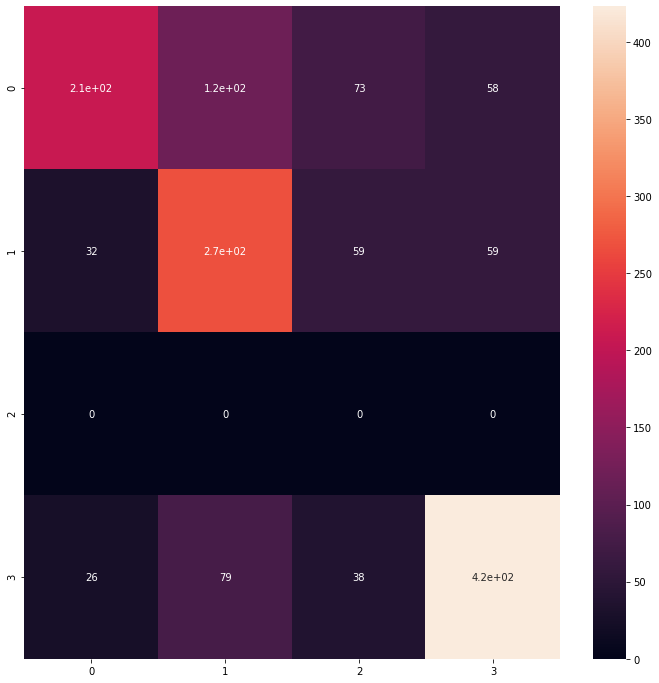

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
# prediction = []
# for p in pred:
#   prediction.append(np.argmax(p))

print('accuracy:', accuracy_score(test_L, prediction))
#test_L
#prediction
confusion = confusion_matrix(test_L, prediction)
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,12))
sns.heatmap(confusion, annot = True)
accuracy_result = accuracy_score(test_L, prediction)
result = precision_recall_fscore_support(test_L, prediction)
confusion = confusion_matrix(test_L, prediction)

accuracy: 0.6121559633027523


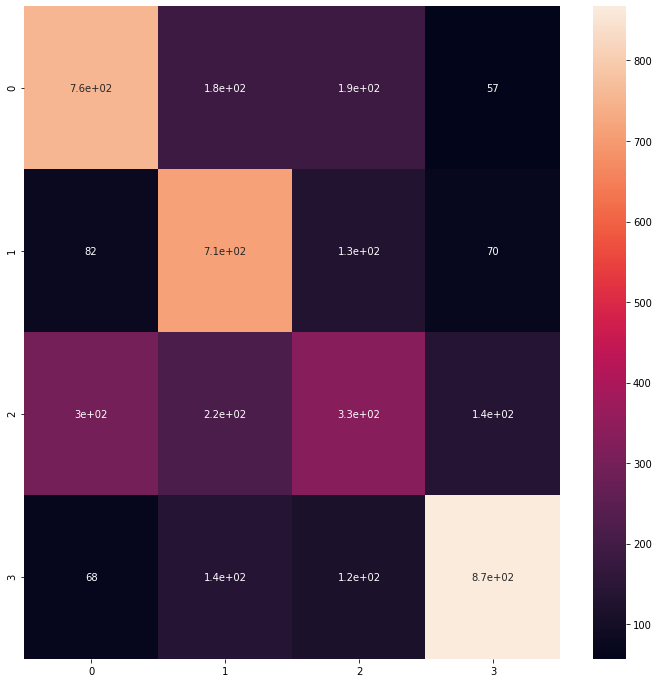

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
# prediction = []
# for p in pred:
#   prediction.append(np.argmax(p))

print('accuracy:', accuracy_score(hub_test_L, prediction_hub))
#test_L
#prediction
confusion = confusion_matrix(hub_test_L, prediction_hub)
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize = (12,12))
sns.heatmap(confusion, annot = True)
hub_accuracy_result = accuracy_score(hub_test_L, prediction_hub)
hub_result = precision_recall_fscore_support(hub_test_L, prediction_hub)
hub_confusion = confusion_matrix(hub_test_L, prediction_hub)

In [ ]:
print(accuracy_result)
print(result) #precision, recall, fbeta_score, support

0.6243936243936244
(array([0.78277154, 0.57725322, 0.        , 0.78333333]), array([0.45633188, 0.64200477, 0.        , 0.74734982]), array([0.57655172, 0.6079096 , 0.        , 0.76491863]), array([458, 419,   0, 566]))


In [ ]:
print(hub_accuracy_result)
print(hub_result)

0.6121559633027523
(array([0.62707641, 0.5689243 , 0.43302991, 0.76590106]), array([0.63820795, 0.71543086, 0.33704453, 0.7279597 ]), array([0.63259321, 0.63382157, 0.37905521, 0.74644856]), array([1183,  998,  988, 1191]))


In [ ]:
happy

1      메리 크리스마스 바람이 엄청 부네요 장박에 금사리 속닥 하이 둘이서 파티 너무 따뜻...
2      케이크 풍년이어라 코코에서 케이크 선물 주신 분 복받으실 거예요 저는 작은 한 조각...
3      직징인고마워미희야구름녹차라떼뷰브케이크존맛탱비쥬얼짱카페민트제이홍데입구역브러치카페앉자서...
4      집콕클수마스끗월요일이라니이번생일은가족과함께하구축하도많이받아너무행복했떠요이번주도일만더...
5      직장인 고마워 미희야 내 인생 상큼한 휴식 직장으로 이젠 삶 속 사진 추억 매일 사...
                             ...                        
490                                           행복했던 크리스마스
491                                         그녀와 함께 여행 일차
493                                              좋았었던 그날
495                                             메리 크리스마스
496                                       함께 보내는 첫 크리스마스
Name: senten, Length: 566, dtype: object